In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
reg_path = "all_registration.csv"
reg_header = ["day", "date", "time", "user_id", "action", "born", "phone", "country", "acquired_from"]
registration = pd.read_csv(reg_path, delimiter=';', names = reg_header)
registration["date"] = pd.to_datetime(registration["date"])

free_path = "all_free_tree.csv"
free_tree = pd.read_csv(free_path, delimiter=';', names =["day", "date", "user_id", "action"])
free_tree["date"] = pd.to_datetime(free_tree["date"])

super_path = "all_super_tree.csv"
super_tree = pd.read_csv(super_path, delimiter=';', names =["day", "date", "user_id", "action"])
super_tree["date"] = pd.to_datetime(super_tree["date"])

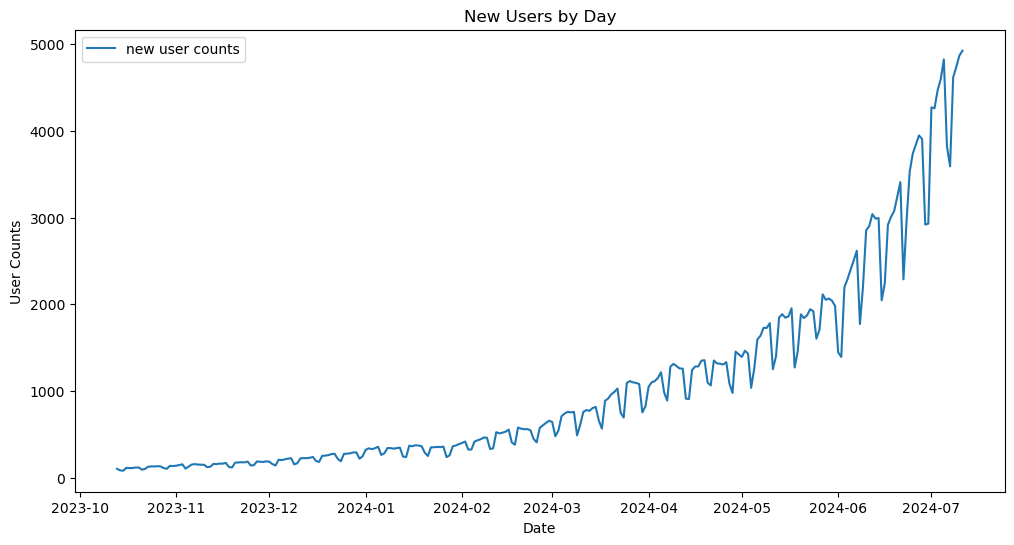

In [3]:
reg_by_day = registration.groupby("date")[["user_id"]].count().reset_index().rename(columns={"user_id":"user_counts"})

x = reg_by_day.date
y = reg_by_day.user_counts

plt.figure(figsize=(12, 6))
plt.plot(x, y, label="new user counts")
plt.xlabel("Date")
plt.ylabel("User Counts")
plt.title("New Users by Day")
plt.legend()
plt.show()

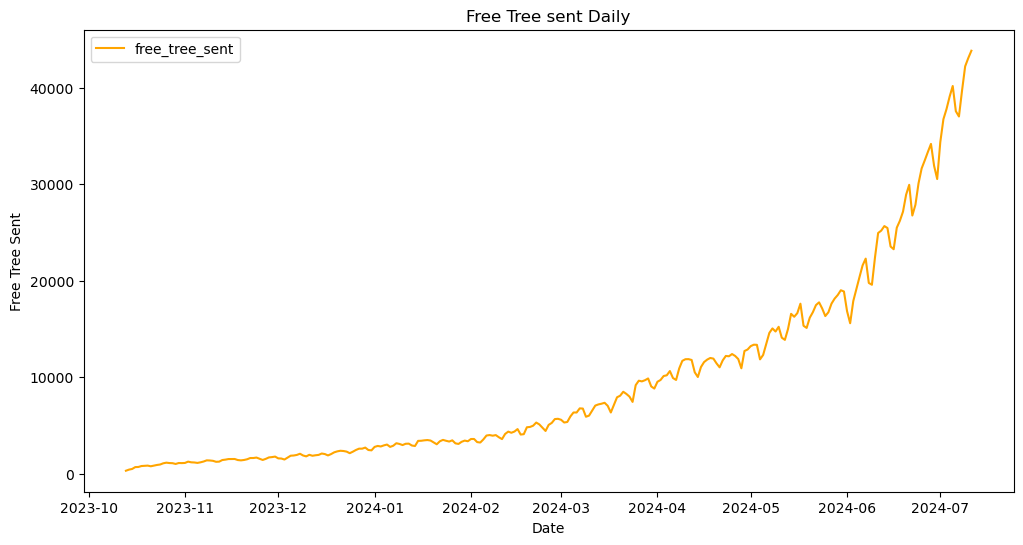

In [4]:
free_tree_sent = free_tree.groupby("date").count()[["user_id"]].reset_index().rename(columns={"user_id":"free_sent"})

x = free_tree_sent.date
y = free_tree_sent.free_sent


plt.figure(figsize=(12,6))
plt.plot(x, y, label="free_tree_sent",color="orange")
plt.xlabel("Date")
plt.ylabel("Free Tree Sent")
plt.title("Free Tree sent Daily")
plt.legend()
plt.show()

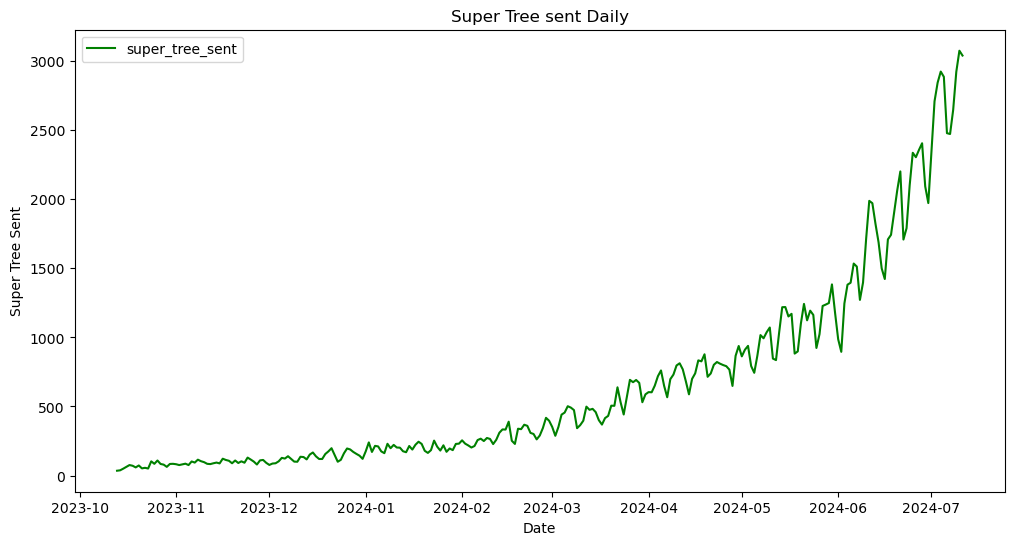

In [5]:
super_tree_sent = super_tree.groupby("date").count()[["user_id"]].reset_index().rename(columns={"user_id":"super_sent"})

x2 = super_tree_sent.date
y2 = super_tree_sent.super_sent


plt.figure(figsize=(12,6))
plt.plot(x2, y2, label="super_tree_sent",color="green")
plt.xlabel("Date")
plt.ylabel("Super Tree Sent")
plt.title("Super Tree sent Daily")
plt.legend()
plt.show()

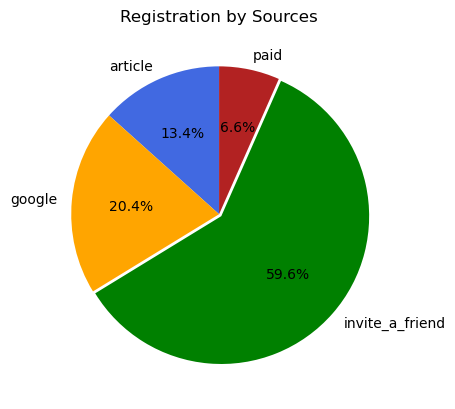

In [6]:
seg_source = registration.groupby("acquired_from").count()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

sources = seg_source.acquired_from
numbers = seg_source.user_count
colors = ["royalblue", "orange", "g", "firebrick"]

plt.pie(numbers, labels=sources,
        colors=colors,
        startangle=90,
        #shadow=True,
        explode=(0,0,0.02,0),
        autopct="%1.1f%%"
        )

plt.title("Registration by Sources")
plt.show()

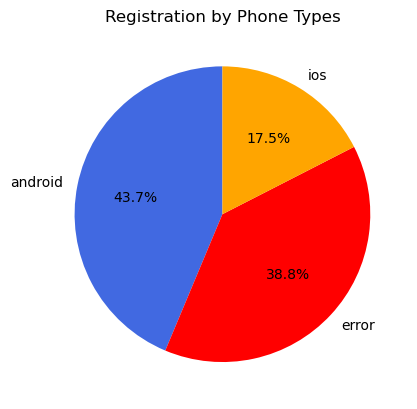

In [7]:
seg_phone = registration.groupby("phone").count()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

sources = seg_phone.phone
numbers = seg_phone.user_count
colors = ["royalblue", "red", "orange"]

plt.pie(numbers, labels=sources,
        colors=colors,
        startangle=90,
        #shadow=True,
        autopct="%1.1f%%"
        )

plt.title("Registration by Phone Types")
plt.show()

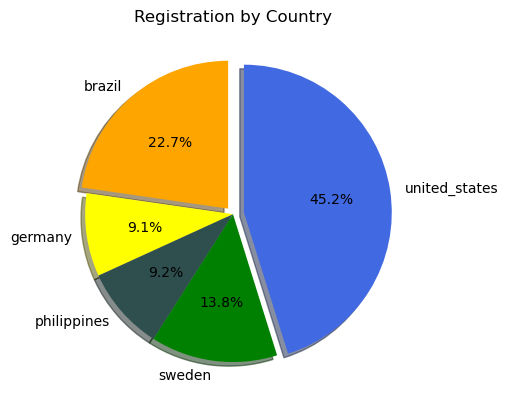

In [8]:
seg_country = registration.groupby("country").count()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

sources = seg_country.country
numbers = seg_country.user_count
colors = ["orange","yellow","darkslategrey","green","royalblue"]

plt.pie(numbers, labels=sources,
        colors=colors,
        startangle=90,
        shadow=True,
        explode=(0.05,0,0,0,0.075),
        autopct="%1.1f%%"
        )

plt.title("Registration by Country")
plt.show()

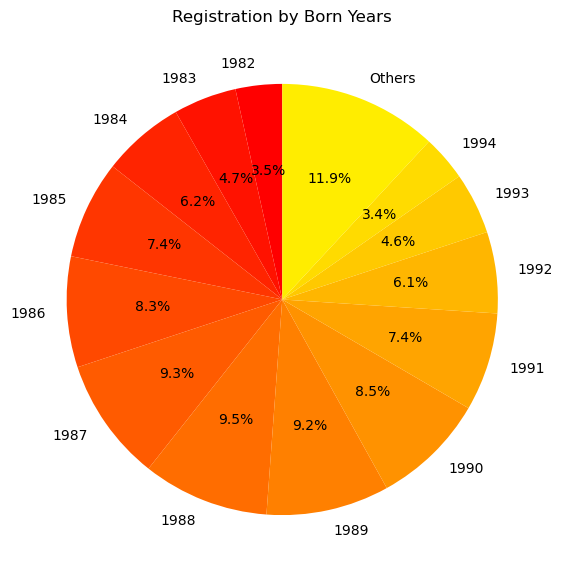

In [9]:
seg_born = registration.groupby("born").count()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

sources = seg_born.born
numbers = seg_born.user_count

total = numbers.sum()
threshold = 0.025 # 2.5%

sources_fin = []
numbers_fin = []
others = 0

for source, num_of_ppl in zip(sources, numbers):
    if num_of_ppl / total <= threshold:
        others += num_of_ppl
    else:
        sources_fin.append(source)
        numbers_fin.append(num_of_ppl)
        
sources_fin.append("Others")
numbers_fin.append(others)

sources = sources_fin
numbers = numbers_fin

num_of_colors = len(sources)

cmap = plt.get_cmap('autumn')
colors = [cmap(i/num_of_colors) for i in range(num_of_colors)]

plt.figure(figsize=(7,7))
plt.pie(numbers, labels=sources,
        colors=colors,
        startangle=90,
        #shadow=True,
        autopct="%1.1f%%"
        )

plt.title("Registration by Born Years")
plt.show()

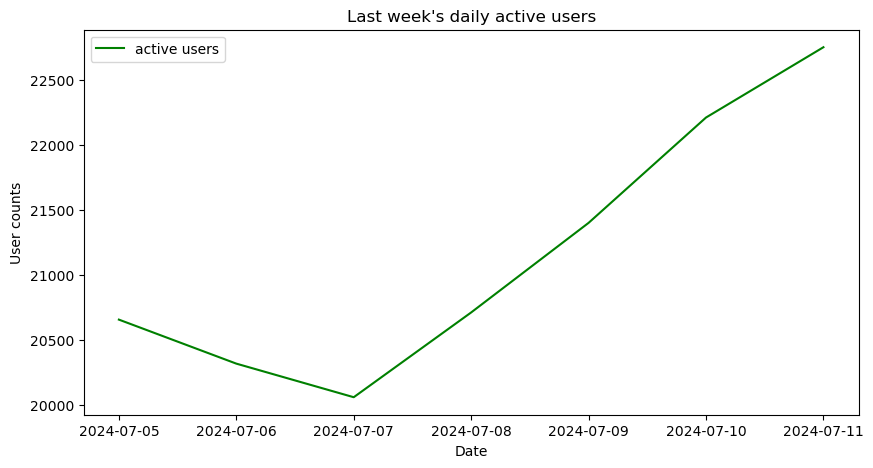

In [10]:
active_users_list = free_tree.merge(super_tree, how="outer", on=["day", "date", "user_id", "action"])
active_users_date = active_users_list.groupby("date").nunique()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

from datetime import timedelta

last_day = active_users_date.date.max()
last_week = last_day - timedelta(days=7)

active_last_week = active_users_date[active_users_date.date > last_week]

x = active_last_week.date
y = active_last_week.user_count

plt.figure(figsize=(10,5))
plt.plot(x, y, label="active users", color="green")
plt.xlabel("Date")
plt.ylabel("User counts")
plt.title("Last week's daily active users")
plt.legend()
plt.show()

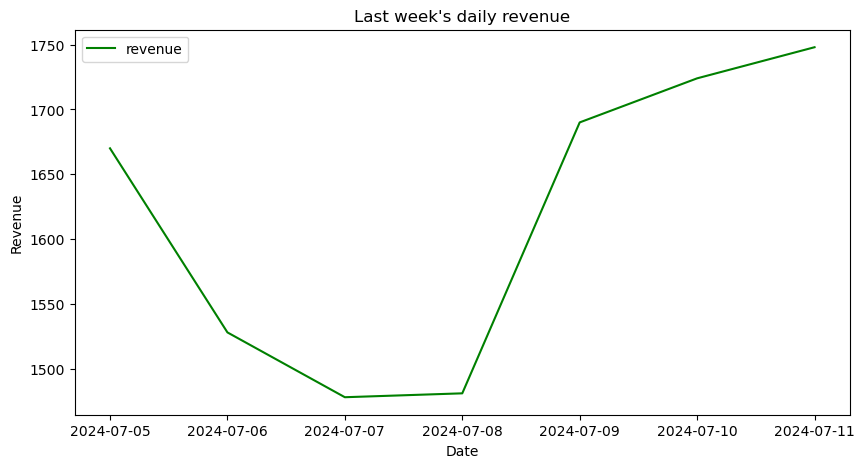

In [11]:
first_super_sent = super_tree.groupby("user_id")[["date"]].min().reset_index().set_index(["date","user_id"])
super_sent_date = super_tree.groupby(["date", "user_id"]).count()[["action"]]

first_sent_check = super_sent_date.index.isin(first_super_sent.index)

revenue_date = super_sent_date.copy()
revenue_date.loc[first_sent_check, "action"] -= 1
revenue_date = revenue_date.groupby("date").sum()[["action"]].reset_index().rename(columns={"action":"revenue"})

from datetime import timedelta

last_day = revenue_date.date.max()
last_week = last_day - timedelta(days=7)

revenue_last_week = revenue_date[revenue_date.date > last_week]

x = revenue_last_week.date
y = revenue_last_week.revenue

plt.figure(figsize=(10,5))
plt.plot(x, y, label="revenue", color="green")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Last week's daily revenue")
plt.legend()
plt.show()

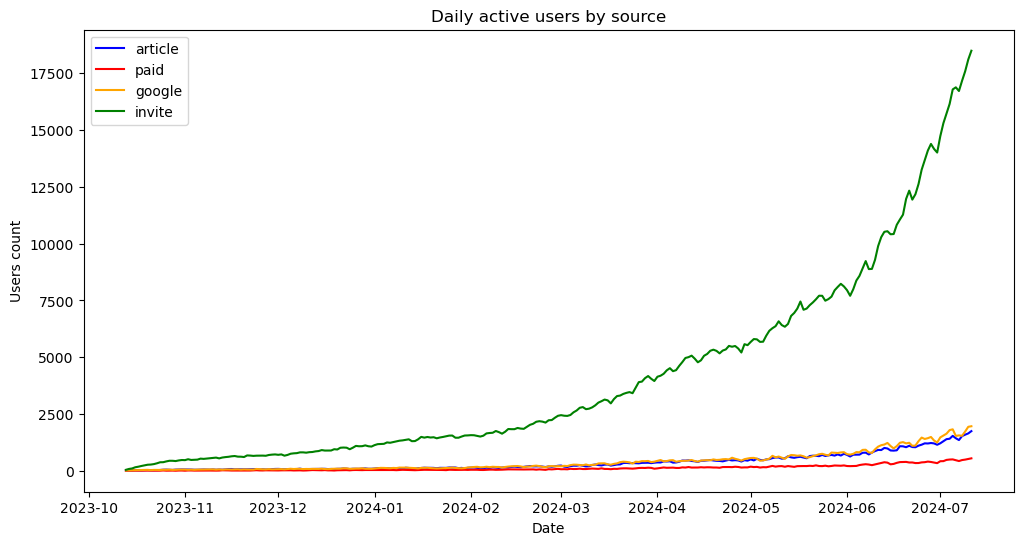

In [39]:
active_user_reg = active_users_list.merge(registration, how="inner", on="user_id")
active_users_acquire_from_date = active_user_reg.groupby(["acquired_from", "date_x"]).nunique()[["user_id"]].reset_index().rename(columns={"user_id":"user_count", "date_x":"date"})

active_users_article = active_users_acquire_from_date[active_users_acquire_from_date.acquired_from == "article"]
active_users_paid = active_users_acquire_from_date[active_users_acquire_from_date.acquired_from == "paid"]
active_users_google = active_users_acquire_from_date[active_users_acquire_from_date.acquired_from == "google"]
active_users_invite = active_users_acquire_from_date[active_users_acquire_from_date.acquired_from == "invite_a_friend"]

x1 = active_users_article.date
y1 = active_users_article.user_count

x2 = active_users_paid.date
y2 = active_users_paid.user_count

x3 = active_users_google.date
y3 = active_users_google.user_count

x4 = active_users_invite.date
y4 = active_users_invite.user_count


plt.figure(figsize=(12,6))
plt.plot(x1, y1, label="article", color="blue")
plt.plot(x2, y2, label="paid", color ="red")
plt.plot(x3, y3, label="google", color="orange")
plt.plot(x4, y4, label="invite", color="green")
plt.xlabel("Date")
plt.ylabel("Users count")
plt.title("Daily active users by source")
plt.legend()
plt.show()

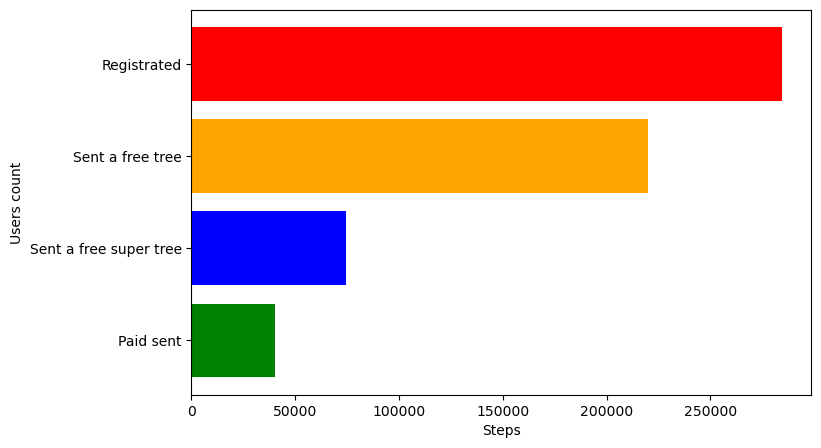

In [5]:
super_sent_by_user = super_tree.groupby("user_id").count()[["action"]].rename(columns={"action": "super_sent"})
paid_super_sent_users = super_sent_by_user[super_sent_by_user["super_sent"] > 1].reset_index()

reg_users = len(registration)
free_sent_users = len(free_tree.groupby("user_id").count())
free_super_users = len(super_tree.groupby("user_id").count())
paid_users = len(paid_super_sent_users)

x = ["Registrated", "Sent a free tree", "Sent a free super tree", "Paid sent"]
y = [reg_users, free_sent_users, free_super_users, paid_users]
colors = ["red", "orange", "blue", "green"]

plt.figure(figsize=(8,5))
plt.barh(x, y, color=colors)
plt.xlabel("Steps")
plt.ylabel("Users count")
plt.gca().invert_yaxis()
plt.show()

In [5]:
from datetime import timedelta

super_free = free_tree.merge(super_tree, how="outer", on=["day", "date", "user_id", "action"])
last_day = registration.date.max()
full_cohort = []
cohort_dates = []

for w in range(15):
    
    last_month = last_day - timedelta(days=30-w)

    reg_day = registration[registration.date == last_month][["user_id","date"]]
    cohort_row = []
    yesterday = reg_day[["user_id"]]

    for i in range(15):
        day_n = f"day_{i}_action"

        new_day = last_month + timedelta(days=i)
        action_day = super_free[super_free.date == new_day][["user_id","date"]]
        reg_day[day_n] = reg_day.user_id.isin(action_day.user_id)

        active_members = reg_day[reg_day[day_n] == True][["user_id",day_n]]
        users = reg_day[reg_day.user_id.isin(active_members.user_id)][["user_id"]]
        returned = yesterday[yesterday["user_id"].isin(users["user_id"])]
        cohort_row.append(len(returned))
        yesterday = users
    
    full_cohort.append(cohort_row)
    cohort_dates.append(last_month)
    
column_names = [f"day_{i}" for i in range(15)]
cohort = pd.DataFrame(full_cohort, columns=column_names)
cohort.insert(0, "reg_date", cohort_dates)
cohort

,reg_date,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14
0,2024-06-11,2284,1819,1045,736,661,604,587,547,490,455,399,398,346,287,294
1,2024-06-12,2342,1832,1017,683,590,550,529,500,449,434,382,366,308,273,266
2,2024-06-13,2292,1758,956,653,570,533,517,514,461,411,362,355,319,282,262
3,2024-06-14,2218,1701,1003,674,576,522,509,489,460,406,348,341,310,272,248
4,2024-06-15,1601,1247,685,496,442,387,368,378,319,300,291,263,231,207,194
5,2024-06-16,1753,1373,825,570,509,467,439,443,382,364,329,318,276,218,197
6,2024-06-17,2255,1765,1022,714,632,558,524,520,490,450,390,333,286,280,269
7,2024-06-18,2259,1737,954,654,566,513,486,482,443,393,360,347,322,281,268
8,2024-06-19,2340,1837,1068,711,631,576,549,535,464,441,403,375,339,284,266
9,2024-06-20,2535,2031,1166,788,691,662,593,574,557,520,494,470,401,338,317
